<br>
<br>
<center>

|Title:     | NLP Assignment 2, Q#2, Word2Vec & FastText |
|         :-            |                             :-:                               |
| **Resource Person:**  | Dr. Maryam Bashir                                      |
| **Course Title:**     | Natural Language Processing                                                 |
| **Credit Hours:**     | 3(3,0)                                                        |
| **Work Objective:**     | Implementation of DL models with Embedding                 |
<br>
            |          **Submitted By** |

|Sr. # | Name                   | Registration No. | Email Address           |
| :-   | :-                     | :-               | :-                      
| 1    | Asif Ahsan | 20L-2370         | l202370@lhr.nu.edu.pk |

<br>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
# from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, GRU, Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

from keras.preprocessing import sequence

import tensorflow as tf

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

# Reading dataset

In [ ]:
df = pd.read_csv("urdu-sentiment-corpus-v1.tsv", delimiter="\t", encoding="utf-8")

In [ ]:
df = df[df['Class'] != 'O']
df.head()

,Tweet,Class
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P
5,گندی زبان اور گٹر جیسے دماغ والے جاهل جیالے ه...,N


# Preprocessing

In [ ]:
!pip install urduhack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 56.4 MB/s eta 0:00:00
  Attempting uninstall: Click
    Found existing installation: click 8.1.3
    Uninstalling click-8.1.3:
      Successfully uninstalled click-8.1.3
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.9.2
    Uninstalling tensorflow-datasets-4.9.2:
      Successfully uninstalled tensorflow-datasets-4.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the fol

In [ ]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


89078/89078 [==============================] - 0s 0us/step


In [ ]:
df['Tweet_cleaned'] = df['Tweet'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(replace_emails) # Replace all emails in text str with replace_with str.
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(remove_english_alphabets) # Removes English words and digits from a text
df['Tweet_cleaned'] = df['Tweet_cleaned'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.

In [ ]:
import re
import nltk

def word_tokenized(text):
    # Tokenize each word
    text =  nltk.WordPunctTokenizer().tokenize(text)
    return text

In [ ]:
df['Tweet_tokenized'] =  df['Tweet_cleaned'].apply(word_tokenized)

In [ ]:
df.head()

,Tweet,Class,Tweet_cleaned,Tweet_tokenized
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P,میں نے ایٹم بم بنایا ھے او بھائی ایٹم بمب کوٹ ...,"[میں, نے, ایٹم, بم, بنایا, ھے, او, بھائی, ایٹم..."
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,"[چندے, سے, انقلاب, اور, عمران, خان, وزیر, اعظم..."
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P,سرچ انجن گوگل کے نائب صدر نے فضا میں فٹ کی بلن...,"[سرچ, انجن, گوگل, کے, نائب, صدر, نے, فضا, میں,..."
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار أ,"[ابھی, تک, اسکی, لہریں, کبھی, کبھی, آ, جاتی, ہ..."
5,گندی زبان اور گٹر جیسے دماغ والے جاهل جیالے ه...,N,گندی زبان اور گٹر جیسے دماغ والے جاہل جیالے ہو...,"[گندی, زبان, اور, گٹر, جیسے, دماغ, والے, جاہل,..."


In [ ]:
# Import Data Preprocessing Libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Encode the labels
le = LabelEncoder()
le.fit(df['Class'])
df['Class'] = le.transform(df['Class'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['Tweet_tokenized'], df['Class'], test_size = 0.25, random_state = 7, shuffle = True)

In [ ]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (735,)
Shape of X_test (245,)
Shape of Y_train (735,)
Shape of Y_test (245,)


In [ ]:
df1 = df.copy()

In [ ]:
# Remove stop words from text
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس میں مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split(", ") if word not in STOP_WORDS)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import spacy
def tokenizer(str):
    nlp = spacy.blank('ur')
    doc = nlp.tokenizer(str)
    return [i.text for i in doc]
df["tokens"] = df["Tweet_cleaned"].apply(tokenizer)

In [ ]:
df.head()

,Tweet,Class,Tweet_cleaned,Tweet_tokenized,tokens
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,1,میں نے ایٹم بم بنایا ھے او بھائی ایٹم بمب کوٹ ...,"[میں, نے, ایٹم, بم, بنایا, ھے, او, بھائی, ایٹم...","[میں, نے, ایٹم, بم, بنایا, ھے, او, بھائی, ایٹم..."
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,0,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,"[چندے, سے, انقلاب, اور, عمران, خان, وزیر, اعظم...","[چندے, سے, انقلاب, اور, عمران, خان, وزیر, اعظم..."
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",1,سرچ انجن گوگل کے نائب صدر نے فضا میں فٹ کی بلن...,"[سرچ, انجن, گوگل, کے, نائب, صدر, نے, فضا, میں,...","[سرچ, انجن, گوگل, کے, نائب, صدر, نے, فضا, میں,..."
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,1,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار أ,"[ابھی, تک, اسکی, لہریں, کبھی, کبھی, آ, جاتی, ہ...","[ابھی, تک, اسکی, لہریں, کبھی, کبھی, آ, جاتی, ہ..."
5,گندی زبان اور گٹر جیسے دماغ والے جاهل جیالے ه...,0,گندی زبان اور گٹر جیسے دماغ والے جاہل جیالے ہو...,"[گندی, زبان, اور, گٹر, جیسے, دماغ, والے, جاہل,...","[گندی, زبان, اور, گٹر, جیسے, دماغ, والے, جاہل,..."


# Word2Vec

In [ ]:
import gensim

model_word2vec = gensim.models.Word2Vec(sentences=df["tokens"], vector_size=128, window=5, workers=10, min_count=1)

In [ ]:
# model_w2v = FastText(df["tokens"], vector_size=300,  window=5)
model_word2vec.train(df["tokens"], total_examples= len(df["tokens"]), epochs=150)

(2101671, 2496000)

In [ ]:
model_word2vec.wv.most_similar(positive='زبان')

[('گندی', 0.6271043419837952),
 ('ذاکر', 0.5663065910339355),
 ('جوپٹوریوں', 0.5378847718238831),
 ('گھر', 0.5307013988494873),
 ('بڑی', 0.5252988934516907),
 ('سمجھاشاید', 0.5120258331298828),
 ('گٹر', 0.5116269588470459),
 ('اپیل', 0.5089778900146484),
 ('سب', 0.5053891539573669),
 ('خواہش', 0.503554105758667)]

In [ ]:
model_word2vec.wv.most_similar("قاتل")

[('مقتول', 0.9678668975830078),
 ('تمظالم', 0.9071810841560364),
 ('مظلوم', 0.8463490009307861),
 ('سدرہ', 0.8422221541404724),
 ('ہوگئیں', 0.8138723373413086),
 ('ازدواج', 0.8128204941749573),
 ('منسلک', 0.8105671405792236),
 ('رشتہ', 0.8074764609336853),
 ('انجام', 0.7809795141220093),
 ('وھ', 0.7694490551948547)]

In [ ]:
model_word2vec.wv.most_similar("عورت")

[('تھیوفا', 0.9119712114334106),
 ('ذات', 0.8829414248466492),
 ('مرد', 0.8507049679756165),
 ('پتھر', 0.7790958881378174),
 ('شرلی', 0.7554786801338196),
 ('کہتی', 0.7474485635757446),
 ('اسودوہ', 0.7069426774978638),
 ('عابدشرلی', 0.7068055868148804),
 ('چھڈیو', 0.6943199038505554),
 ('حجر', 0.6926467418670654)]

In [ ]:
model_word2vec.wv.most_similar("بمب")

[('کوٹ', 0.9765730500221252),
 ('لکھپت', 0.9236005544662476),
 ('ایٹم', 0.8856752514839172),
 ('بم', 0.8216408491134644),
 ('بنتاایٹم', 0.8056259155273438),
 ('او', 0.7819945812225342),
 ('کہوٹہ', 0.7808095812797546),
 ('مصیبتوں', 0.7723274827003479),
 ('فقر', 0.743894100189209),
 ('صفحہ', 0.7369732856750488)]

In [ ]:
VOCAB_SIZE = len(model_word2vec.wv.key_to_index)
DIMENSIONS = 128
MAX_LEN = max([len(x) for x in df["tokens"]])

In [ ]:
VOCAB_SIZE, DIMENSIONS, MAX_LEN

(4604, 128, 35)

In [ ]:
from keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(df["tokens"])
encoded = token.texts_to_sequences(df["tokens"])

In [ ]:
words2vec_matrix = np.zeros((VOCAB_SIZE+1,DIMENSIONS))
for word, index in token.word_index.items():
    try:
        words2vec_matrix[index] = model_word2vec.wv[word]
    except:
        print(index, word)

In [ ]:
import tensorflow as tf
train_vectors = tf.keras.preprocessing.sequence.pad_sequences(encoded,padding='post',dtype=int)

In [ ]:
train_label = df.Class

In [ ]:
type(train_label[0])

numpy.int64

In [ ]:
(train_sentences,test_sentences, train_tags, test_tags) = train_test_split(train_vectors, train_label, test_size=0.2, shuffle = True)

In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
from tensorflow.keras.optimizers import Adam, Optimizer, SGD
import tensorflow.keras.initializers as Init
from tensorflow.keras import regularizers

In [ ]:
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(words2vec_matrix),
                            output_dim=DIMENSIONS,
                            weights=[words2vec_matrix],
                            input_length=MAX_LEN,
                            trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, activation='tanh', dropout=0.3, recurrent_dropout=0.2, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, activation='tanh', dropout=0.3, recurrent_dropout=0.2)),
    # tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.summary()

# model = Sequential([
#     Embedding(input_dim=len(words2vec_matrix),
#                             output_dim=128,
#                             weights=[words2vec_matrix],
#                             input_length=35,
#                             trainable=False),
#     GRU(200, dropout=0.3, activation='tanh', return_sequences=True),
#     GRU(100, dropout=0.3, activation='tanh'),
#     Dense(1,'sigmoid')
# ])
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Accuracy'])
# print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 128)           589440    
                                                                 
 bidirectional (Bidirectiona  (None, 35, 400)          526400    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              400800    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 1,516,841
Trainable params: 927,401
Non-trainable params: 589,440
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
hist = model_bilstm.fit(train_sentences,train_tags,epochs=50,batch_size=64,verbose=2,validation_data=(test_sentences,test_tags), callbacks=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10))

Epoch 1/50
13/13 - 25s - loss: 0.6806 - accuracy: 0.5510 - val_loss: 0.6858 - val_accuracy: 0.5306 - 25s/epoch - 2s/step
Epoch 2/50
13/13 - 7s - loss: 0.6098 - accuracy: 0.6696 - val_loss: 0.6939 - val_accuracy: 0.5714 - 7s/epoch - 520ms/step
Epoch 3/50
13/13 - 9s - loss: 0.5799 - accuracy: 0.6607 - val_loss: 0.6924 - val_accuracy: 0.5816 - 9s/epoch - 689ms/step
Epoch 4/50
13/13 - 17s - loss: 0.5166 - accuracy: 0.7347 - val_loss: 0.7463 - val_accuracy: 0.5816 - 17s/epoch - 1s/step
Epoch 5/50
13/13 - 9s - loss: 0.4903 - accuracy: 0.7653 - val_loss: 0.8123 - val_accuracy: 0.5918 - 9s/epoch - 695ms/step
Epoch 6/50
13/13 - 8s - loss: 0.4402 - accuracy: 0.7921 - val_loss: 0.9151 - val_accuracy: 0.5816 - 8s/epoch - 592ms/step
Epoch 7/50
13/13 - 7s - loss: 0.3736 - accuracy: 0.8099 - val_loss: 0.8135 - val_accuracy: 0.5918 - 7s/epoch - 545ms/step
Epoch 8/50
13/13 - 8s - loss: 0.2900 - accuracy: 0.8750 - val_loss: 1.0308 - val_accuracy: 0.6071 - 8s/epoch - 647ms/step
Epoch 9/50
13/13 - 7s - lo

In [ ]:
test_pred = model_bilstm.predict(test_sentences)
y_prediction = list()
a=0
b=1
for val in test_pred:
  if val < 0.5:
    y_prediction.append(a)
  else:
    y_prediction.append(b)

class_report = classification_report(y_prediction, test_tags)
conf_matrix = confusion_matrix(y_prediction , test_tags)

print('\n \t\tResults of GRU')
print("\n--- CLASSIFICATION REPORT\n",class_report, "\n --- CONFUSION MATRIX\n",conf_matrix)

7/7 [==============================] - 1s 43ms/step

 		Results of GRU

--- CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.51      0.60      0.56        91
           1       0.60      0.50      0.55       105

    accuracy                           0.55       196
   macro avg       0.55      0.55      0.55       196
weighted avg       0.56      0.55      0.55       196
 
 --- CONFUSION MATRIX
 [[55 36]
 [52 53]]


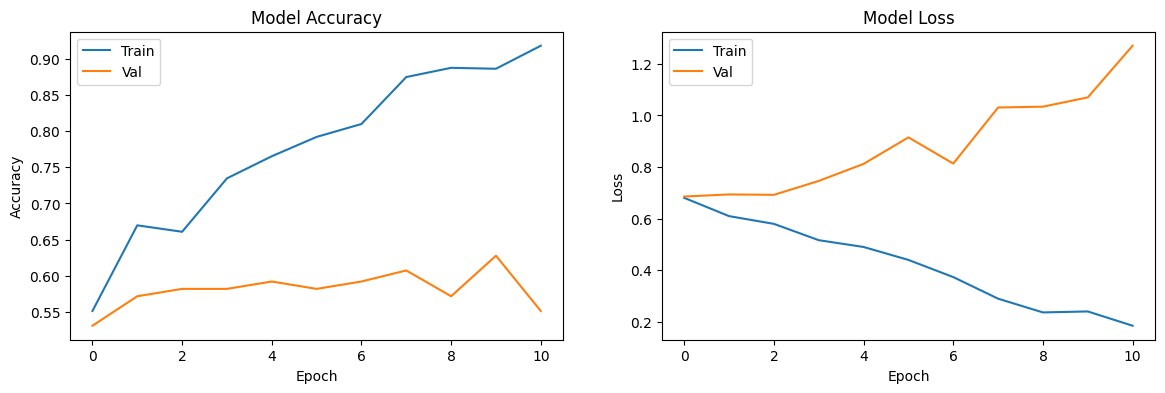

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Plot the first graph on the left axis
axes[0].plot(hist.history['accuracy'])
axes[0].plot(hist.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(['Train', 'Val'])

# Plot the second graph on the right axis
axes[1].plot(hist.history['loss'])
axes[1].plot(hist.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(['Train', 'Val'])

# Display the plot
plt.show()

# FastText

In [ ]:
from gensim.models import FastText
model_fastext = FastText(sentences=df["tokens"], vector_size=128, window=5, workers=10, min_count=1)

In [ ]:
model_fastext.train(df["tokens"], total_examples= len(df["tokens"]), epochs=150)

(2101674, 2496000)

In [ ]:
model_fastext.wv.most_similar('زبان')

[('میزبان', 0.8737021088600159),
 ('سنسان', 0.8591155409812927),
 ('ہان', 0.8394685983657837),
 ('جہان', 0.8371821641921997),
 ('شیطان', 0.8355795741081238),
 ('ڈان', 0.8309608697891235),
 ('ان', 0.8292749524116516),
 ('سبحان', 0.8288838267326355),
 ('لسان', 0.8252147436141968),
 ('بزرگان', 0.8168450593948364)]

In [ ]:
model_fastext.wv.most_similar("قاتل")

[('گوگل', 0.7318695187568665),
 ('گوگو', 0.7051239609718323),
 ('غافل', 0.7041675448417664),
 ('گھمن', 0.7033051252365112),
 ('تباہ', 0.6965556144714355),
 ('ویلکمجی', 0.6963640451431274),
 ('ک', 0.6963223218917847),
 ('ویلفیئر', 0.6913543939590454),
 ('قائل', 0.6904496550559998),
 ('سلوک', 0.6880623698234558)]

In [ ]:
model_fastext.wv.most_similar("بمب")

[('بم', 0.8849321007728577),
 ('بنتاایٹم', 0.8510225415229797),
 ('لکھپت', 0.7997567057609558),
 ('ایٹم', 0.7899001240730286),
 ('او', 0.7322729229927063),
 ('اتفاق', 0.6797533631324768),
 ('وی', 0.6740456819534302),
 ('آیی', 0.6719011664390564),
 ('لفافہ', 0.6686913967132568),
 ('اورمکرتی', 0.6610715985298157)]

In [ ]:
VOCAB_SIZE = len(model_fastext.wv.key_to_index)
DIMENSIONS = 128
MAX_LEN = max([len(x) for x in df["tokens"]])

In [ ]:
VOCAB_SIZE, DIMENSIONS, MAX_LEN

(4604, 128, 35)

In [ ]:
from keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(df["tokens"])
encoded = token.texts_to_sequences(df["tokens"])

In [ ]:
fasttext_matrix = np.zeros((VOCAB_SIZE+1,DIMENSIONS))
for word, index in token.word_index.items():
    try:
        fasttext_matrix[index] = model_fastext.wv[word]
    except:
        print(index, word)

In [ ]:
import tensorflow as tf
train_vectors = tf.keras.preprocessing.sequence.pad_sequences(encoded,padding='post',dtype=int)

In [ ]:
train_label = df.Class
type(train_label[0])

numpy.int64

In [ ]:
(train_sentences,test_sentences, train_tags, test_tags) = train_test_split(train_vectors, train_label, test_size=0.2, shuffle = True)

In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
from tensorflow.keras.optimizers import Adam, Optimizer, SGD
import tensorflow.keras.initializers as Init
from tensorflow.keras import regularizers

In [ ]:
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(fasttext_matrix),
                            output_dim=DIMENSIONS,
                            weights=[fasttext_matrix],
                            input_length=MAX_LEN,
                            trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, activation='tanh', dropout=0.3, recurrent_dropout=0.2, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, activation='tanh', dropout=0.3, recurrent_dropout=0.2)),
    # tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 35, 128)           589440    
                                                                 
 bidirectional_2 (Bidirectio  (None, 35, 400)          526400    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              400800    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 1,516,841
Trainable params: 927,401
Non-trainable params: 589,440
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
hist = model_bilstm.fit(train_sentences,train_tags,epochs=50,batch_size=64,verbose=2,validation_data=(test_sentences,test_tags), callbacks=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10))

Epoch 1/50
13/13 - 20s - loss: 0.6798 - accuracy: 0.5485 - val_loss: 0.6689 - val_accuracy: 0.5918 - 20s/epoch - 2s/step
Epoch 2/50
13/13 - 7s - loss: 0.6174 - accuracy: 0.6569 - val_loss: 0.6782 - val_accuracy: 0.5663 - 7s/epoch - 528ms/step
Epoch 3/50
13/13 - 8s - loss: 0.5687 - accuracy: 0.7054 - val_loss: 0.6807 - val_accuracy: 0.5969 - 8s/epoch - 654ms/step
Epoch 4/50
13/13 - 8s - loss: 0.5333 - accuracy: 0.7130 - val_loss: 0.7124 - val_accuracy: 0.5867 - 8s/epoch - 596ms/step
Epoch 5/50
13/13 - 7s - loss: 0.4825 - accuracy: 0.7449 - val_loss: 0.7259 - val_accuracy: 0.6122 - 7s/epoch - 566ms/step
Epoch 6/50
13/13 - 8s - loss: 0.4605 - accuracy: 0.7730 - val_loss: 0.7082 - val_accuracy: 0.6071 - 8s/epoch - 648ms/step
Epoch 7/50
13/13 - 7s - loss: 0.3991 - accuracy: 0.8202 - val_loss: 0.8717 - val_accuracy: 0.5714 - 7s/epoch - 506ms/step
Epoch 8/50
13/13 - 9s - loss: 0.3449 - accuracy: 0.8444 - val_loss: 0.8078 - val_accuracy: 0.6276 - 9s/epoch - 663ms/step
Epoch 9/50
13/13 - 9s - l

In [ ]:
test_pred = model_bilstm.predict(test_sentences)
y_prediction = list()
a=0
b=1
for val in test_pred:
  if val < 0.5:
    y_prediction.append(a)
  else:
    y_prediction.append(b)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(test_tags, y_prediction)
# Calculate precision
precision = precision_score(test_tags, y_prediction)
# Calculate recall
recall = recall_score(test_tags, y_prediction)
# Calculate F-score
f_score = f1_score(test_tags, y_prediction)

print("\n\t\t\t\t\t\t\tEVALUATION MEASURES RESULTS")
print("\t\t\t\t\t\t","_"*40)
print("\nAccuracy:", accuracy, "     |\t", "Precision:", precision, "     |\t", "Recall:", recall, "    |\t", "F-score:", f_score,"\n")

7/7 [==============================] - 0s 42ms/step

							EVALUATION MEASURES RESULTS
						 ________________________________________

Accuracy: 0.6224489795918368      |	 Precision: 0.654320987654321      |	 Recall: 0.5353535353535354     |	 F-score: 0.5888888888888889 



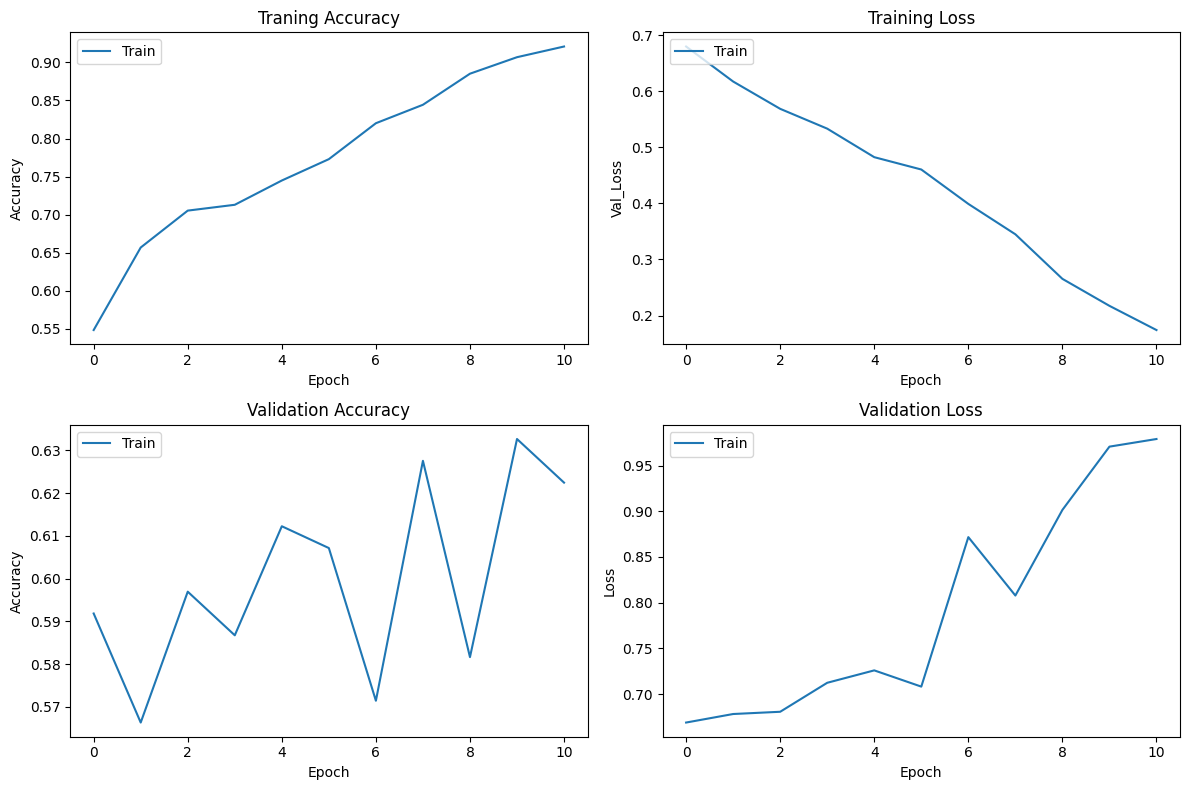

In [ ]:
# Define the figure and axes objects
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the first graph on the top-left axis
axes[0, 0].plot(hist.history['accuracy'])
axes[0, 0].set_title('Traning Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend(['Train', 'Test'], loc='upper left')

# Plot the second graph on the top-right axis
axes[0, 1].plot(hist.history['loss'])
axes[0, 1].set_title('Training Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Val_Loss')
axes[0, 1].legend(['Train', 'Test'], loc='upper left')

# Plot the third graph on the bottom-left axis
axes[1, 0].plot(hist.history['val_accuracy'])
axes[1, 0].set_title('Validation Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend(['Train', 'Test'], loc='upper left')

# Plot the fourth graph on the bottom-right axis
axes[1, 1].plot(hist.history['val_loss'])
axes[1, 1].set_title('Validation Loss')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend(['Train', 'Test'], loc='upper left')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()